# Lois de Kepler 

Points du programme : 
- Écrire une équation adimensionnée.
- Capacité numérique : à l’aide d’un langage de programmation, obtenir des trajectoires d’un point matériel soumis à un champ de force centrale conservatif.
- Énoncer les lois de Kepler pour les planètes et les transposer au cas des satellites terrestres.

But du TP : 
- Adimensionner l'équation obtenue pour un astre soumis à une force centrale et tracer plusieurs types de trajectoires possibles en utilisant une méthode de résolution d'équation différentielle (odeint). Les lois de Kepler pourront être testées avec cette simulation.
- Tester la deuxième et troisième loi de Kepler en utilisant des données expérimentales (coordonnées d'un satellite et trajectoires d'étoiles autour du trou noir supermassif de notre galaxie. 

In [1]:
# import des bibliothèques de base comme toujours et de la méthode odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## I - Simulation des lois de Kepler

L'objectif de cette partie est de simuler un mouvement d'un point soumis à un champ de force central et de retrouver les lois de Kepler. Dans un premier temps, l'idée est d'adimensionner l'équation différentielle du mouvement obtenue à partir du principe fondamental de la dynamique.

### I.1 - Adimensionnement

Soit M un astre considéré comme un point matériel de masse m soumis à une force centrale gravitationnelle $\vec{F} = -\frac{Gmm'}{||\overrightarrow{OM}||^3}\overrightarrow{OM}$ où m' est la masse de l'astre vérifiant $m'\gg m$ dont le centre O est l'origine d'un référentiel galiléen (on suppose le centre de masse du système confondu avec O pour l'étude du mouvement du point M). 

Le TMC appliqué sur le point matériel nous indique que le moment cinétique est conservé :
- Le mouvement est donc plan. Nous utiliserons la base et les coordonnées cylindriques pour étudier ce mouvement dans le plan z = 0. La force se réecrit dans cette base $\vec{F} = -\frac{Gmm'}{r^2}\vec{u}_r,$
avec $\vec{u}_r$ le vecteur radial. 
- La constante des aires $C = r^2 \dot{\theta}$ dépendra des conditions initiales $r(t=0) = r_0$ et $\dot{\theta}(t=0) = \omega_0$ puisque $C = r^2 \dot{\theta} = r_0^2\omega_0$ ($\dot{\theta}$ : vitesse angulaire).

Appliquons le TEM : 
- Notons $Em_0$ l'énergie mécanique à l'instant initial. 
- L'énergie cinétique s'écrit pour tout temps en coordonnées cylindriques (mouvement plan) $Ec = \frac{1}{2}m\left(\dot{r}^2 + \left(r\dot{\theta}\right)^2\right)$. La variable $\dot{\theta}$ est liée à $r$ par la constante des aires, ce qui permet de réécrire l'énergie cinétique uniquement en fonction d'une seule variable : $Ec = \frac{1}{2}m\left(\dot{r}^2 + \frac{C^2}{r^2}\right)$. 
- L'énegie potentielle s'écrit $Ep = -\frac{Gmm'}{r} + Ep_\infty$ où $Ep_\infty$ est une constante arbitraire (on retrouve ce résultat en utilisant $\vec{F}.d\overrightarrow{OM} = -dEp$). 
- La force centrale étant conservative, l'énergie mécanique du système est conservée $Em_0 = E_p + E_c$. En éliminant les constantes et en divisant le tout par $m/2$, la dérivée conduit à la relation : 

$$
\begin{align}
\dfrac{\rm d}{\rm dt}\left(\dot{r}^2 + \frac{C^2}{r^2} -\frac{2Gm'}{r} \right) &= 0\\
\ddot{r}\dot{r} &= \frac{2\dot{r}C^2}{r^3} -\frac{2\dot{r}Gm'}{r^2}\\
\ddot{r} &= \frac{C^2}{r^3} -\frac{Gm'}{r^2} \label{eq:mvt1} \tag{1}
\end{align}
$$

La vitesse angulaire vérifie l'équation :

$$
\begin{align}
\dot{\theta} &= \dfrac{C}{r^2} \label{eq:mvt2} \tag{2} 
\end{align}
$$


<div class="alert alert-block alert-success">
    <b>Questions (sur feuille):</b> <br>
    1 - Montrer que l'on peut définir à partir de l'équation (1) une distance d'équilibre (Indication : valeur de $r$ pour une accélération radiale nulle, notée $r_c$).<br>
    2 - En déduire l'expression de la période de rotation $T_c$ en fonction de la constante des aires et de $r_c$. 
</div>
Les valeurs $r_c$ et $T_c$ sont des paramètres caractéristiques d'un mouvement circulaire uniforme. Nous allons nous en servir pour adimensionner l'équation (1).
<div class="alert alert-block alert-success">
    <b>Questions (sur feuille):</b> <br>
    3 - Effectuer les changements de variables suivants : $t \rightarrow T = 2\pi t / T_c$ et $r \rightarrow R = r/r_c$, et montrer que les équations (1) et (2) se mettent sous la forme suivante (en fonction de R et T uniquement) : 
    $$ 
    \begin{cases}
    R~'' = -\dfrac{1}{R^2} + \dfrac{1}{R^3},\\
    \theta~' = \dfrac{1}{R^2},
    \end{cases}
    $$
avec la notation $X' = \frac{dX}{dT}$. 
</div>
Remarquez que les équations et les variables R et T sont maintenant adimensionnés : aucune unité ne rentre en jeu dans l'étude de ce problème autre que des unités de type comptage (comme les radians pour le temps : une trajectoire circulaire complète est effectuée par l'astre en un "temps adimensionné" $T = 2\pi$). 

### I.2 - Résolution numérique

La méthode `odeint()` prend en premier argument une fonction `f(Y,t)`, en deuxième une condition ininitiale `Y0` (valeur de Y au temps initial) et en troisième position une liste de temps `t`. 

La fonction `f` prend en un argument des coordonnées et dérivées de coordonnées que l'on peut mettre sous forme de liste : par exemple, on peut écrire `Y = [theta, R, Rp]`, une liste contenant la valeur de $\theta, R$ et $R~'$. 

Pour qu'elle soit compatible avec `odeint`, la fonction `f` devra retourner la dérivée de Y au temps t considéré et aux coordonnées Y(t) : la fin de la fonction se termine par `return [1/(R**2), Rp, ---- à vous de jouer -----]`.     

En choisissant une liste (de type numpy.array) de 1000 valeurs pour le temps `t = np.linspace(0, 2 * np.pi, 1000)`, l'expression `A = odeint(f, [theta0, R0, Rp0], t)` créera un tableau `A` de 1000 lignes et 3 colonnes représentant les valeurs estimées de $\theta, R$ et $R~'$ à chaque temps présent dans la liste `t`.

<div class="alert alert-block alert-success">
    <b>Question :</b> <br>
    4 - Coder la fonction $f(Y,t)$ puis lui appliquer la méthode odeint en prenant les conditions initiales [0, 1, 0]. Tracez la trajectoire du point matériel. Est-ce bien la trajectoire attendue pour ces conditions initiales ?
</div>

Vous pourrez tracer les différentes positions du point matériel en utilisant les coordonnées cartésiennes `X = A[:, 1] * np.cos(A[:, 0])` et `Y = A[:, 1] * np.sin(A[:, 0])` et utiliser la ligne de commande `plt.axis('equal')` pour avoir un ratio de 1:1 pour les deux axes. 

L’aire d’un triangle quelconque dont les côtés ont pour longueur a, b, c s’obtient par la formule de Héron d'Alexandrie
$𝑆 = \sqrt{𝑝(𝑝− 𝑎)( 𝑝− 𝑏)(𝑝− 𝑐)}$ où p est le demi-périmètre du triangle.

<div class="alert alert-block alert-success">
    <b>Questions :</b> <br>
    5 - Créer un tableau de valeurs noté D contenant la différence de distance entre deux positions successives (X[i],Y[i]) et (X[i+1],Y[i+1]).<br>
    6 - En utilisant la formule de Héron d'Alexandrie et en s'inspirant de la fonction aire ci-dessous, déterminer l'aire balayée pour différentes conditions initiales et pour différents durées (faire varier la valeur finale de t). On fera attention à la taille du tableau de valeurs D par rapport à celle du tableau R = A[:,1]  
</div>

In [2]:
def aire(a,b,c):
    p=(a+b+c)/2
    S=(p*(p-a)*(p-b)*(p-c))**0.5
    return S

## II - Tester la deuxième loi de Kepler avec un satellite artificiel

L'adresse suivante permet de suivre en direct la position de nombreux satellites https://www.n2yo.com
voici une copie d'écran pour le suivi d'un satellite Américain.
![](https://raw.githubusercontent.com/p-maxime/codes_python/master/kepler1.PNG)
Voici le suivi de ce satellite pour une durée de 45 min  

In [3]:
## t en s
temps=np.array([-2.0,0.0,2.0,4.0,6.0,8.0,10.0,12.0,14.0,15.5,17.0,18.5,
            20.0,21.5,23.0,24.5,26.5,28.0,29.5,31.0,32.0,33.0])*60
## latitude en degre
lat=np.array([-23.84,-22.88,-21.72,-20.31,-18.63,-16.63,-14.27,-11.52,
              -8.36,-5.7,-2.83,0.24,3.45,6.75,10.05,13.25,17.2,19.81,22.03,23.84,24.81,25.60])
## longitude en degre
lon=np.array([61.3,65.0,68.99,73.29,77.93,82.94,88.36,94.20,100.51,105.56,110.89,
              116.52,122.45,128.67,135.18,141.93,151.24,158.37,165.53,172.62,177.27,181.81])
## altitude en km
h=np.array([4345.54,3923.32,3500.69,3080.13,2664.79,2258.66,1866.75,1495.19,1151.40,916.91,706.83,
            525.31,376.43,263.92,190.90,159.47,183.73,250.78,357.59,500.16,615.51,743.38])*10**3

<script type="text/javascript" src="https://www.n2yo.com/js/widget-tracker.js"></script>

On peut ensuite construire les listes correspondant au rayon (r), à la longitude corrigée de la 
rotation terrestre (loncr), à la latitude en radians (latr) et enfin aux coordonnées cartésiennes 
de la position (x,y et z).

In [4]:
## Rayon terrestre en m
Rt=6378.0*10**3
## Jour sideral en s
Js=1436.066*60
## Vitesse angulaire en degre/s
w=360/Js
## nombre de positions
n=len(temps)

## initialisations
r=np.zeros(n)
loncr=np.zeros(n)
latr=np.zeros(n)
x=np.zeros(n)
y=np.zeros(n)
z=np.zeros(n)

## positions dans referentiel geocentrique en m
for i in range(n):
## rayon de l'orbite du satellite
    r[i]=h[i]+Rt
## longitude corrigee de la rotation propre
    loncr[i]=(lon[i]+w*temps[i])/180*np.pi
## latitude
    latr[i]=lat[i]/180*np.pi
## coordonnees en m
    x[i]=r[i]*np.cos(latr[i])*np.cos(loncr[i])
    y[i]=r[i]*np.cos(latr[i])*np.sin(loncr[i])
    z[i]=r[i]*np.sin(latr[i])

On calcule ensuite l’aire balayée par le rayon vecteur grâce à la formule de Héron d’Alexandrie. 

Pour cela, on va écrire que l’aire balayée par le rayon  vecteur entre les instants i et i+1 est celle d’un triangle de côtés r[i], r[i+1] et d[i], où d est la  liste des distances parcoures entre les instants i et i+1. Pour calculer cette distance, on utilise l’expression de la distance en coordonnées cartésiennes. 

Attention : chaque élément de cette liste étant une différence calculée entre i et i+1, la taille de la liste est n-1 et non plus n comme pour les listes précédentes. Ainsi, pour l’exploitation graphique, il sera parfois nécessaire d’ôter le dernier élément de certaines listes pour qu’abscisse et ordonnée soient des listes de même taille (par exemple, la liste des temps raccourcis s’obtient via tt=temps[ :-1])

In [5]:
## initiation des listes de distances et de temps
tt=temps[:-1] # On crée une liste de temps où l'on supprime la dernière valeur, 
            #pour avoir la bonne taille de liste dans la suite
d=np.zeros(n-1) #idem : la liste des distances parcourues entre deux instants 
                # doit avoir un élément de moins que la liste des positions
v=np.zeros(n-1) # idem dans la suite
S=np.zeros(n-1)
s=np.zeros(n-1)


### Fonction de calcul de l'aire 
### avec formule de Heron
def aire(a,b,c):
    p=(a+b+c)/2
    S=(p*(p-a)*(p-b)*(p-c))**0.5
    return S

for i in range(0,n-1):
    d[i]= ((x[i+1]-x[i])**2+(y[i+1]-y[i])**2+(z[i+1]-z[i])**2)**(1/2) # distances parcourues entre les instants t[i] et t[i+1]
    v[i]=d[i]/(temps[i+1]-temps[i]) # vitesse moyenne entre les instants t[i] et t[i+1]
    S[i]= aire(r[i],r[i+1],d[i]) # aire balayée estimée entre les instants t[i] et t[i+1]
    s[i]=S[i]/(temps[i+1]-temps[i]) # vitesse aréolaire estimée entre les instants t[i] et t[i+1]

Voici comment visualiser la vitesse aréolaire (Pour le tracé de la vitesse aréolaire, il faut à nouveau prendre garde à la taille des listes manipulées (c’est l’intérêt de la définition de la fonction mod)), soit utiliser un histogramme de la distribution des valeurs de la vitesse aréolaire, calculée en chaque point.

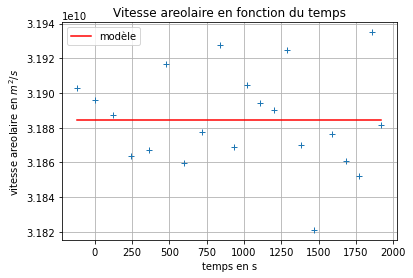

In [6]:
va=np.polyfit(tt,s,0)
mod=0*tt+va

plt.plot(tt,s,"+")
plt.plot(tt,mod,'r-',label='modèle')
plt.title("Vitesse areolaire en fonction du temps")
plt.xlabel("temps en s")
plt.ylabel("vitesse areolaire en $m^2/s$")
plt.grid(True)
plt.legend()
plt.show()

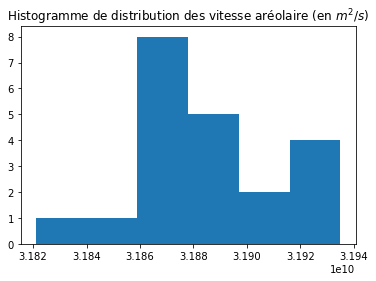

La vitesse aréolaire vaut 3.18847e+10 $m^2/s$
Son incertitude-type  vaut 6.1e+06 $m^2/s$


In [7]:
plt.hist(s, bins='rice')  # La commande 'rice' permet d'optimiser les intervalles d'affichage de l'histogramme
plt.title(r"Histogramme de distribution des vitesse aréolaire (en $m^2/s$)")
plt.show()

va = np.mean(s)
uva = np.std(s,ddof=1)/np.sqrt(len(s))

print(r"La vitesse aréolaire vaut {:.5e} $m^2/s$".format(va))
print(r"Son incertitude-type  vaut {:.1e} $m^2/s$".format(uva))

<div class="alert alert-block alert-success">
    <b>Questions :</b> <br>
    7 - La deuxième loi de Kepler est-elle vérifiée ?<br>
    8 - Tracer la distance du satellite par rapport au centre de la Terre ainsi que sa vitesse.<br>
    9 - Tracer l'énergie mécanique massique du satellite en s'inspirant du code permettant de visualiser la vitesse aréolaire. Conclure.
</div>

## Tester la troisième loi de Kepler

Le trou noir supermassif au centre de notre galaxie, la Voie Lactée, correspond à la source 
Sagittarius A*. La figure suivante montre les trajectoires de quelques étoiles autour de ce trou 
noir. Sur wikipédia, on peut trouver les paramètres orbitaux de quelques-unes de ces étoiles, 
vérifier la troisième loi de Képler et ainsi remonter à une estimation de la masse du trou noir 
central. 


![](https://raw.githubusercontent.com/p-maxime/codes_python/master/kepler2.PNG)

Le tableau précédent permet de construire des listes des valeurs de période de révolution T et de demi grand axe a, puis des listes des valeurs de $T^2$ et $a^3$, de  sorte  à  pouvoir  vérifier  dans  un  premier  temps  graphiquement  la 
troisième loi de Képler :
$$\dfrac{T^2}{a^3} = \rm constante $$
où la constante a pour expression $\frac{4\pi^2}{GM}$ avec $M$ la masse de l'astre le plus massif.

<div class="alert alert-block alert-success">
    <b>Questions :</b> <br>
    10 - Tracer $T^2$ en fonction de $a^3$. <br>
    11 - Traver le rapport $\frac{4\pi^2a^3}{GT^2}$ et en déduire la valeur de la masse du trou noir M avec les incertitudes associées u(M).<br>
    12 - Comparez à la valeur tabulée Mt =8,2541 ± 0,0278e+36 kg en utilisant la formule de l'écart normalisé : $$EN = \dfrac{M - Mt}{\sqrt{u(M)^2 + u(Mt)^2}}$$
</div>